[_Pandas_][1] is the most exahustive library for data analysis in Python, and it can be described as the Pythonic son of SQL and Excel. It is based on _NumPy_ and _matplotlib_, but provides a unified API for many data-related operations, including manipulation, I/O, indexing, alignment, vizualizations, pivoting, grouping, etc.. In addition, it provides an impressive set of tools for working with time-series.

[1]: http://pandas.pydata.org/ "pandas org"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.set_option('notebook_repr_html', True)

# The _Series_ class

_Series_ objects should be thought of as table columns. Although they are not exactly like _NumPy's_ 1-dimensional arrays, they are very similar, and behave similarly in many cases. _Series_ objects have many attributes and support many methods, which are all documented alphabetically [here][1] and by subject [here][2].

The elements of the series (and the rows of the data-frame, as we'll see later) are **labeled** by an important attribute called **_index_**, which is an instance of the class [_Index_][3] (or one of its subclasses). If _index_ is not specified, then the elements are labeled by the regular row-counter, and the _index_ of the _series_ contains the integers from 0 to _n-1_.

[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html "Series API documentation A-Z"
[2]: http://pandas.pydata.org/pandas-docs/stable/api.html#series "Series API documentation"
[3]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.html "Index API documentation"

> **NOTE:** The index values do **NOT** have to be unique. This is actually a very important concept, which has a lot to do with the speed of _pandas_.

In [2]:
dudes_names = pd.Series(['Avi', 'Ben', 'Gad', 'Dor', 'Hen'])
print dudes_names

0    Avi
1    Ben
2    Gad
3    Dor
4    Hen
dtype: object


In [3]:
dudes_ages = pd.Series([4, 4, 5, 3, 3])
print dudes_ages

0    4
1    4
2    5
3    3
4    3
dtype: int64


In [4]:
dudes_young = dudes_ages < 5
print dudes_young

0     True
1     True
2    False
3     True
4     True
dtype: bool


In [5]:
dudes_ages = pd.Series([4, 4, 5, 3, 3], index=dudes_names)
print dudes_ages

Avi    4
Ben    4
Gad    5
Dor    3
Hen    3
dtype: int64


## Indexing and selecting data

Being both array-like and dictionary-like, _Series_ objects intuitively support the standard item-getters of the form _s[label]_ and _s[i]_. However, these may be both impractical or ambiguous in some cases, so to provide maximum clarity, _pandas_ supports two methods for indexing and selecting data:

* Label-based - implemented by the item-getter _loc_
* integer-position-based - implemented by the item-getter _iloc_
* mixed - implemented by the item-getter _ix_

These methods work very well for simple cases, but may be very confusing in more complex scenarios. In such cases it is a good idea to try the thorough documentation for [indexing and selecting data][1]. We will mostly use the _ix_ indexer.

[1]: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-and-selecting-data "indexing and selecting data"

### Label-based

In [6]:
dudes_ages

Avi    4
Ben    4
Gad    5
Dor    3
Hen    3
dtype: int64

In [7]:
print dudes_ages.loc[['Ben']]
# print dudes_ages.loc[['Avi', 'Gad']]

Ben    4
dtype: int64


### Integer-location-based

In [8]:
print dudes_ages.iloc[1]
print dudes_ages.iloc[[0, 2]]

4
Avi    4
Gad    5
dtype: int64


### Potential probelms

In [9]:
dudes_names_2 = pd.Series(['Avi', 'Ben', 'Gad', 'Dor', 'Hen'],
                          index=[4, 4, 5, 3, 3])
print dudes_names_2

4    Avi
4    Ben
5    Gad
3    Dor
3    Hen
dtype: object


In [10]:
dudes_names_2.ix[3]

C:\Users\AmitRappel\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


3    Dor
3    Hen
dtype: object

Addressing the data with _ix_ defaults to the index, and if we want to get the data by its numbering, then we will have to use _iloc_.

In [11]:
dudes_names_2.iloc[3]

'Dor'

## Important attributes

_s.index_ returns the _index_ of _s_ (instance of the _Index_ class).

In [12]:
dudes_ages.index

Index([u'Avi', u'Ben', u'Gad', u'Dor', u'Hen'], dtype='object')

_s.values_ returns the values of _s_ as an instance of the _Array_ class.

In [13]:
dudes_ages.values

array([4, 4, 5, 3, 3], dtype=int64)

## Important methods

_Series_ objects support nearly all the methods of _Arrays_, but also many more, including the following.

### _apply(func)_

The _apply(func)_ method applies the function _func_ on each element of the calling series and returns a new series with the returned values.

In [14]:
def dup_string(s):
    return 2*s

In [16]:
print dudes_names.apply(dup_string)

0    AviAvi
1    BenBen
2    GadGad
3    DorDor
4    HenHen
dtype: object


### _unique()_ and _nunique()_

The _unique()_ method returns an _array_ of the unique elements of the calling object. The method _nunique()_ returns the number of unique values in the series.

In [17]:
pms = pd.Series(['David Ben-Gurion', 'Moshe Sharett', 
                 'David Ben-Gurion', 'Levi Eshkol', 'Golda Meir',
                 'Yitzhak Rabin', 'Menachem Begin', 'Yitzhak Shamir', 
                 'Shimon Peres', 'Yitzhak Shamir', 'Yitzhak Rabin',
                 'Shimon Peres', 'Benjamin Netanyahu', 'Ehud Barak',
                 'Ariel Sharon', 'Ehud Olmert', 'Benjamin Netanyahu'])

In [18]:
print pms

0       David Ben-Gurion
1          Moshe Sharett
2       David Ben-Gurion
3            Levi Eshkol
4             Golda Meir
5          Yitzhak Rabin
6         Menachem Begin
7         Yitzhak Shamir
8           Shimon Peres
9         Yitzhak Shamir
10         Yitzhak Rabin
11          Shimon Peres
12    Benjamin Netanyahu
13            Ehud Barak
14          Ariel Sharon
15           Ehud Olmert
16    Benjamin Netanyahu
dtype: object


In [19]:
print pms.unique()
print pms.nunique()

['David Ben-Gurion' 'Moshe Sharett' 'Levi Eshkol' 'Golda Meir'
 'Yitzhak Rabin' 'Menachem Begin' 'Yitzhak Shamir' 'Shimon Peres'
 'Benjamin Netanyahu' 'Ehud Barak' 'Ariel Sharon' 'Ehud Olmert']
12


### _value_\__counts()_

The [_value_\__counts()_][1] method returns a new _series_ instance in which the unique elements of the calling object are the _index_ elements, and the values are their corresponding counts.

[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.CategoricalIndex.value_counts.html#pandas.CategoricalIndex.value_counts "Series.value_counts() documentation"

In [23]:
pms.value_counts()

Shimon Peres          2
Yitzhak Rabin         2
Benjamin Netanyahu    2
David Ben-Gurion      2
Yitzhak Shamir        2
Ehud Olmert           1
Moshe Sharett         1
Golda Meir            1
Levi Eshkol           1
Ariel Sharon          1
Menachem Begin        1
Ehud Barak            1
dtype: int64

In [24]:
pms_count = pms.value_counts()
print pms_count.index

Index([u'Shimon Peres', u'Yitzhak Rabin', u'Benjamin Netanyahu',
       u'David Ben-Gurion', u'Yitzhak Shamir', u'Ehud Olmert',
       u'Moshe Sharett', u'Golda Meir', u'Levi Eshkol', u'Ariel Sharon',
       u'Menachem Begin', u'Ehud Barak'],
      dtype='object')


In [25]:
print type(pms_count)

<class 'pandas.core.series.Series'>


### _sort_\__values()_

The [_sort_\__values()_][1] method sorts the elements of the calling object **and keeps their index**. 

[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html#pandas.Series.sort_values "Series.sort_values() documentation"

In [26]:
pms = pms.sort_values(inplace=True)
print pms

None


### The _str_ accessor

When the series dtype is 'str', there is a collection of special methods available. They are all collected and accessed through the accessor [_str_][1], and are called only through it. We demonstrate below.

[1]: http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling "The str accessor"

In [27]:
str_series = pd.Series(['yesterday', 'all', 'my', 'troubles',
                        'seem', 'so', 'far', 'away'])

In [28]:
print str_series.str.endswith('y')

0     True
1    False
2     True
3    False
4    False
5    False
6    False
7     True
dtype: bool


In [29]:
print str_series.str.endswith('y')

0     True
1    False
2     True
3    False
4    False
5    False
6    False
7     True
dtype: bool


In [30]:
print str_series.str.replace('a', 'A')

0    yesterdAy
1          All
2           my
3     troubles
4         seem
5           so
6          fAr
7         AwAy
dtype: object


> **NOTE:** _pandas_ supports two other accessors - [_dt_][1] for datetime dtype and [_cat_][2] for categorical data.

[1]: http://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties "The dt accessor"
[2]: http://pandas.pydata.org/pandas-docs/stable/api.html#categorical "The cat accessor"

## Categorical data

Numerical data has an inherent order which is already implemented. Very often the data is **categorical**, which means it has intuitive categories (e.g. color, Gender, Origin, etc.), and also very often these categories have some natural order (e.g. rank, quality, etc.). _Pandas_ has a special _Categorical_ class for working with categorical data, and supports several methods for this kind of object (detailed at the [_cat_][1] accessor part).

Full explanation about the usage of categorical data in _pandas_ can be found [here][2]. It worth mentioning that behind the scenes, each category "label" is assigned an integer **code**. These codes will play an important role later in our course.

[1]: http://pandas.pydata.org/pandas-docs/stable/api.html#categorical "The cat accessor"
[2]: http://pandas.pydata.org/pandas-docs/stable/categorical.html "Categorical data documentation"

To illustrate, let us consider the following series of days, representing the occurences of some event. We note that not all the possible days appear in the data.

In [31]:
events = pd.Series(['Sunday', 'Tuesday', 'Wednesday', 'Monday', 
                    'Monday', 'Sunday', 'Thursday'])
print events

0       Sunday
1      Tuesday
2    Wednesday
3       Monday
4       Monday
5       Sunday
6     Thursday
dtype: object


When we sort the data, naturally the days are sorted by their alphabetical names.

In [32]:
print events.sort_values()

3       Monday
4       Monday
0       Sunday
5       Sunday
6     Thursday
1      Tuesday
2    Wednesday
dtype: object


Defining the days as "categories" will allow us, by specifying the argument _ordered_, to sort them by their natural order.

In [33]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday',
        'Thursday', 'Friday', 'Saturday']
events = events.astype("category", categories=days, ordered=True)

In [34]:
print events.sort_values()

0       Sunday
5       Sunday
3       Monday
4       Monday
1      Tuesday
2    Wednesday
6     Thursday
dtype: category
Categories (7, object): [Sunday < Monday < Tuesday < Wednesday < Thursday < Friday < Saturday]


### The _cat_ accessor

Similar to the _str_ accessor, the _cat_ accessor supports several attributes and methods for categorical data.

In [35]:
print events.cat.codes

0    0
1    2
2    3
3    1
4    1
5    0
6    4
dtype: int8


In [36]:
print events.cat.categories
events.cat.remove_categories(['Friday', 'Saturday'], inplace=True)
print events.cat.categories

Index([u'Sunday', u'Monday', u'Tuesday', u'Wednesday', u'Thursday', u'Friday',
       u'Saturday'],
      dtype='object')
Index([u'Sunday', u'Monday', u'Tuesday', u'Wednesday', u'Thursday'], dtype='object')


## Plotting

The [Series._plot()_][1] method is a simple and general wrapper for many of the simple plot functions of matplotlib. In addition, _Series_ objects support specific methods for plotting, which are simple wrappers for the same matplotlib functions. They are all documented [here][2].

Note that by default, the x-axis is defined by the index of the Series.

[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html#pandas.Series.plot "Series.plot() documentation"
[2]: http://pandas.pydata.org/pandas-docs/stable/api.html#plotting "Series plotting API"

In [37]:
y_series = pd.Series(np.random.rand(10), 
                     index=np.linspace(0, 45, 10))
y_series

0.0     0.756309
5.0     0.642965
10.0    0.101189
15.0    0.661467
20.0    0.510115
25.0    0.318897
30.0    0.136126
35.0    0.437674
40.0    0.731217
45.0    0.607374
dtype: float64

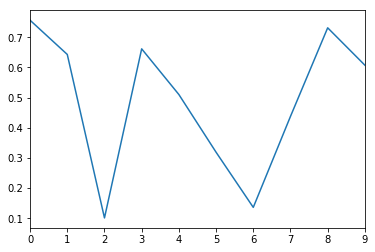

In [38]:
y_series.plot(use_index=False)

Yet another example...

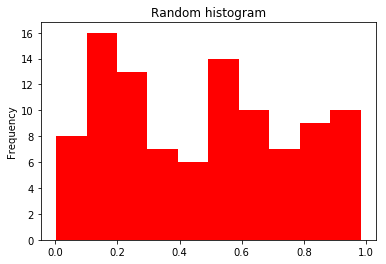

In [39]:
data = pd.Series(np.random.rand(100))
data.plot(kind='hist', title='Random histogram', color='red')

# The _DataFrame_ class

The _DataFrame_ is the primary _pandas_ data structure, and can be thought of as a dict-like container for _Series_ objects. _DataFrame_ objects have many attributes and support many methods, which are all documented alphabetically [here][1] and by subject [here][2].

Like in the _Series_ objects, the rows are labeled by the **_index_**, but for DataFrames there is another labeling for the columns, called **columns** (which is also an instance of the _Index_ class). If either is not specified, then the elements are labeled by the regular row-counter.

Most of the fundamental functionalities of _DataFrames_ are similar to those of the _Series_, so we will suffice with a short demonstration.

[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame "DataFrame API documentation A-Z"
[2]: http://pandas.pydata.org/pandas-docs/stable/api.html#dataframe "DataFrame API documentation"

In [40]:
dudes_names = pd.Series(['Avi', 'Ben', 'Avi', 'Dor', 'Hen'])
dudes_ages = pd.Series([32, 34, 21, 53, 19])
dudes_married = pd.Series([True, False, False, True, True])

In [41]:
data = {'Name': dudes_names,
        'Age': dudes_ages,
        'is_married': dudes_married}

In [42]:
dudes = pd.DataFrame(data)
dudes.head()

,Age,Name,is_married
0,32,Avi,True
1,34,Ben,False
2,21,Avi,False
3,53,Dor,True
4,19,Hen,True


> **NOTE:** The above cool data frame representation is called HTML representation, and it is enabled by the options set at the first cell of this document. It is evident when not using the _print_ function, but rather looking at the stdout.

### Adding columns

In [43]:
dudes['is_single'] = ~dudes['is_married']
dudes['birth year'] = 2017 - dudes['Age']
dudes

,Age,Name,is_married,is_single,birth year
0,32,Avi,True,False,1985
1,34,Ben,False,True,1983
2,21,Avi,False,True,1996
3,53,Dor,True,False,1964
4,19,Hen,True,False,1998


## Important attributes

In [44]:
print dudes.index

RangeIndex(start=0, stop=5, step=1)


In [45]:
print dudes.columns

Index([u'Age', u'Name', u'is_married', u'is_single', u'birth year'], dtype='object')


In [46]:
dudes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
Age           5 non-null int64
Name          5 non-null object
is_married    5 non-null bool
is_single     5 non-null bool
birth year    5 non-null int64
dtypes: bool(2), int64(2), object(1)
memory usage: 202.0+ bytes


In [47]:
print dudes.values

[[32L 'Avi' True False 1985L]
 [34L 'Ben' False True 1983L]
 [21L 'Avi' False True 1996L]
 [53L 'Dor' True False 1964L]
 [19L 'Hen' True False 1998L]]


## Important methods

### _head()_ and _tail()_

The methods _head()_ and _tail()_ print the first and last rows respectively of a DataFrame.

In [48]:
dudes.head()

,Age,Name,is_married,is_single,birth year
0,32,Avi,True,False,1985
1,34,Ben,False,True,1983
2,21,Avi,False,True,1996
3,53,Dor,True,False,1964
4,19,Hen,True,False,1998


In [49]:
dudes.tail(3)

,Age,Name,is_married,is_single,birth year
2,21,Avi,False,True,1996
3,53,Dor,True,False,1964
4,19,Hen,True,False,1998


### _set_\__index()_

Allows to set the _DataFrame_ index (row labels) using one or more existing columns.

In [50]:
dudes

,Age,Name,is_married,is_single,birth year
0,32,Avi,True,False,1985
1,34,Ben,False,True,1983
2,21,Avi,False,True,1996
3,53,Dor,True,False,1964
4,19,Hen,True,False,1998


In [51]:
dudes.set_index('Name', inplace=True)
dudes

,Age,is_married,is_single,birth year
Name,,,,
Avi,32,True,False,1985
Ben,34,False,True,1983
Avi,21,False,True,1996
Dor,53,True,False,1964
Hen,19,True,False,1998


In [52]:
dudes['Name'] = dudes.index

In [53]:
dudes

,Age,is_married,is_single,birth year,Name
Name,,,,,
Avi,32,True,False,1985,Avi
Ben,34,False,True,1983,Ben
Avi,21,False,True,1996,Avi
Dor,53,True,False,1964,Dor
Hen,19,True,False,1998,Hen


### _read_\__csv()_

One of _pandas_ greatest features is its wrappers for I/O operations with various file formats. The entire list is documented [here][1], but we will see the most common method - [_read_\__csv()_][2].

[1]: http://pandas.pydata.org/pandas-docs/stable/api.html#input-output "DataFrame I/O documentation"
[2]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html "read_csv() documentation"

In [54]:
data = pd.read_csv("dessert.csv", index_col='id')
data.head()

,day.of.week,num.of.guests,hour,table,dessert
id,,,,,
1,Monday,2,evening,13,True
2,Saturday,4,night,19,True
3,Saturday,4,after-noon,12,False
4,Thursday,3,night,5,True
5,Monday,7,noon,10,True


> **NOTE:** _read_\__csv()_ is a very powerful method. Note that many things are infered automatically. In our example the header, the dtypes and the fact that the 'dessert' column is Boolean.

### apply()

Similar to the _Series.apply()_ method, this method applies a function on every row (or column) of the data frame. The API is documented [here][1] and a detailed explanation os its usage ca be found [here][2].

[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html "DataFrame.apply() API"
[2]: http://pandas.pydata.org/pandas-docs/stable/basics.html#row-or-column-wise-function-application "DataFrame.apply() documentation"

In [55]:
data.head()

,day.of.week,num.of.guests,hour,table,dessert
id,,,,,
1,Monday,2,evening,13,True
2,Saturday,4,night,19,True
3,Saturday,4,after-noon,12,False
4,Thursday,3,night,5,True
5,Monday,7,noon,10,True


By default, the given function is applied on each column.

In [56]:
data.apply(min)

day.of.week          Friday
num.of.guests             1
hour             after-noon
table                     1
dessert               False
dtype: object

If we apply the given function on the rows (using _axis=1_), then the _columns_ attribute of the data frame is the index of each row.

In [57]:
def is_weekend(row):
    return row['day.of.week'] in ['Friday', 'Saturday']

data['is_weekend'] = data.apply(is_weekend, axis=1)

In [58]:
data.head()

,day.of.week,num.of.guests,hour,table,dessert,is_weekend
id,,,,,,
1,Monday,2,evening,13,True,False
2,Saturday,4,night,19,True,True
3,Saturday,4,after-noon,12,False,True
4,Thursday,3,night,5,True,False
5,Monday,7,noon,10,True,False


### drop()

The method [_drop()_][1] removes the specified rows/columns from the calling dataframe.

[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html "drop() API"

In [59]:
data.drop(['table', 'dessert'], axis=1).head()

,day.of.week,num.of.guests,hour,is_weekend
id,,,,
1,Monday,2,evening,False
2,Saturday,4,night,True
3,Saturday,4,after-noon,True
4,Thursday,3,night,False
5,Monday,7,noon,False


### pivot_table()

The [_pandas.pivot_\__table(data, values=None, index=None, columns=None, aggfunc='mean', fill_\__value=None)_][1] method creates a spreadsheet-style pivot table as a DataFrame. Its arguments control the processing of the content of the pivot table.

[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html "pivot_table() API"

> **NOTE:** This is not an instance method but rather a class method.

#### Example 1 - simple aggregation

Simple aggregations can be performed by giving simple values to _aggfunc_.

In [60]:
pd.pivot_table(data,
               index='day.of.week',
               columns='hour', 
               values='num.of.guests', 
               aggfunc='count',
               fill_value=0)

hour,after-noon,evening,night,noon
day.of.week,,,,
Friday,28,100,39,67
Monday,10,46,19,30
Saturday,16,82,46,71
Sunday,11,39,20,24
Thursday,8,45,17,32
Tuesday,13,51,29,32
Wednesday,11,56,21,37


#### Example 2 - user-defined aggregation

In [61]:
def get_percent(x):
    return float(sum(x)) / len(x) * 100

pd.pivot_table(data,
               index='day.of.week',
               columns='num.of.guests', 
               values='dessert', 
               aggfunc=get_percent,
               fill_value=0)

num.of.guests,1,2,3,4,5,6,7,8,9,10
day.of.week,,,,,,,,,,
Friday,0.000000,40.909091,35.294118,21.951220,21.428571,42.857143,50.000000,0,50,66.666667
Monday,18.181818,89.473684,54.545455,55.555556,25.000000,100.000000,66.666667,100,100,100.000000
Saturday,40.000000,94.202899,60.000000,57.142857,54.545455,84.615385,100.000000,100,100,0.000000
Sunday,25.000000,86.111111,52.941176,56.250000,25.000000,100.000000,50.000000,100,0,0.000000
Thursday,28.571429,94.285714,68.421053,38.095238,66.666667,85.714286,100.000000,100,100,100.000000
Tuesday,47.058824,100.000000,91.304348,84.000000,100.000000,100.000000,100.000000,0,100,100.000000
Wednesday,58.823529,100.000000,95.000000,95.833333,92.857143,100.000000,100.000000,100,100,100.000000


### plot()

DataFrames also support the _plot()_ method which is a wrapper for matplotlib functions. We will demonstrate this functionality in the examples below.

# The _GroupBy()_ class

_pandas_ supports many SQL-like featrues, including Boolean indexing (WHERE/HAVING), join() (JOIN), append() (UNION), sort_values() (ORDER BY) and many others. One of the most important features is the [_GroupBy_ class][1], which is a superset of  the GROUP BY command in SQL. It supports a neat **Split-Apply-Combine** mechanism which facilitates the application of (mostly) aggregative functions on sub-groups of the data.

The _GroupBy_ Split-Apply-Combine mechanism has a fairly simple 2-step call.

* The 1st step is to call _groupby(key)_. This will **split** the data by the specified _key_, and return a _GroupBy_ object.
* The 2nd step is to call some aggregative function on the object. This will **apply** the function to each split and **combine** the results back.

The returned value after the "combine" step is a new _DataFrame_, with the same rows as the original one, except for the _key_ column(s) which become the _index_. A detailed explanation of the above can be found [here][2].

[1]: http://pandas.pydata.org/pandas-docs/stable/api.html#groupby "The GroupBy class"
[2]: http://pandas.pydata.org/pandas-docs/stable/groupby.html "GroupBy explanation"
[3]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby "DataFrame.GroupBy documentation"

In [62]:
grpby_dow = data.groupby('day.of.week')
print type(grpby_dow)
print grpby_dow.groups.keys()

<class 'pandas.core.groupby.DataFrameGroupBy'>
['Monday', 'Tuesday', 'Friday', 'Wednesday', 'Thursday', 'Sunday', 'Saturday']


In [63]:
grpby_dow_sum = grpby_dow.sum()
grpby_dow_sum

,num.of.guests,table,dessert,is_weekend
day.of.week,,,,
Friday,739,2784,68.0,234.0
Monday,337,1277,70.0,0.0
Saturday,714,2398,155.0,215.0
Sunday,301,1093,59.0,0.0
Thursday,346,1255,73.0,0.0
Tuesday,401,1532,110.0,0.0
Wednesday,417,1628,115.0,0.0


The apply-combine steps can be executed on a specific column(s).

In [64]:
# grpby_dow.count()
# grpby_dow.count()['num.of.guests']
grpby_dow['num.of.guests'].count()

day.of.week
Friday       234
Monday       105
Saturday     215
Sunday        94
Thursday     102
Tuesday      125
Wednesday    125
Name: num.of.guests, dtype: int64

In [65]:
grpby_dow

In [66]:
# print grpby_dow.sum()
print grpby_dow['dessert'].sum()

day.of.week
Friday        68.0
Monday        70.0
Saturday     155.0
Sunday        59.0
Thursday      73.0
Tuesday      110.0
Wednesday    115.0
Name: dessert, dtype: float64


In [67]:
grpby_tbl = data.groupby('table')

In [68]:
grpby_tbl['dessert'].apply(lambda s: float(s.sum()) / s.count())

table
1     0.671429
2     0.651163
3     0.714286
4     0.650000
5     0.655172
6     0.555556
7     0.660714
8     0.625000
9     0.645833
10    0.725000
11    0.547619
12    0.666667
13    0.657895
14    0.589744
15    0.717949
16    0.633333
17    0.571429
18    0.738095
19    0.680851
20    0.581818
21    0.750000
22    0.595745
23    0.632653
Name: dessert, dtype: float64

# Example 1 - dessert buyers

## Get the data

In [69]:
data = pd.read_csv("dessert.csv", index_col='id')
data['not.dessert'] = ~data['dessert']
data.head()

,day.of.week,num.of.guests,hour,table,dessert,not.dessert
id,,,,,,
1,Monday,2,evening,13,True,False
2,Saturday,4,night,19,True,False
3,Saturday,4,after-noon,12,False,True
4,Thursday,3,night,5,True,False
5,Monday,7,noon,10,True,False


In [70]:
# data.groupby('num.of.guests').sum()
data.groupby('num.of.guests')[['dessert', 'not.dessert']].sum()

,dessert,not.dessert
num.of.guests,,
1,30.0,77.0
2,264.0,54.0
3,122.0,80.0
4,100.0,80.0
5,47.0,44.0
6,41.0,7.0
7,20.0,4.0
8,8.0,0.0
9,8.0,1.0


## Buyers vs. non-buyers

### Grouping by categories

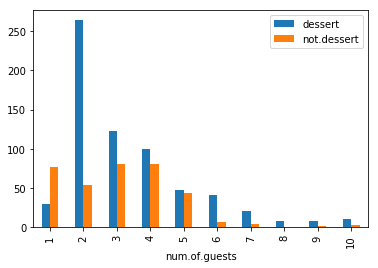

In [71]:
# data.groupby('num.of.guests').sum().plot(kind='bar')
# data.groupby('num.of.guests')['dessert'].sum().plot(kind='bar')
data.groupby('num.of.guests')[['dessert', 'not.dessert']] \
    .sum().plot(kind='bar')

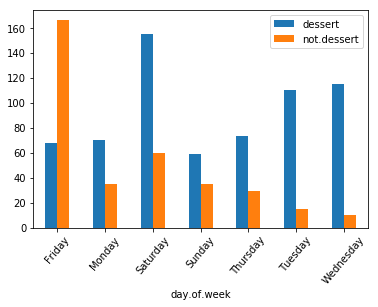

In [72]:
data.groupby('day.of.week')[['dessert', 'not.dessert']] \
    .sum().plot(kind='bar', rot=50)

### Ordering the categories

If the categories are ordered, then their order will influence the plot.

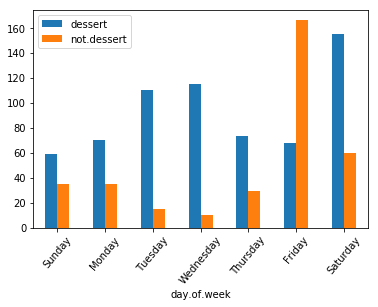

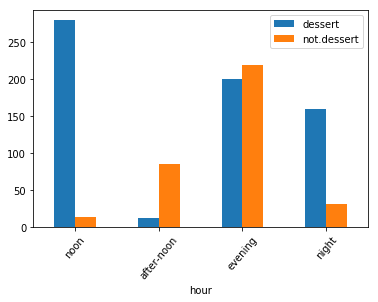

In [73]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 
        'Thursday', 'Friday', 'Saturday']
data['day.of.week'] = data['day.of.week'].astype(
    'category', categories=days, ordered=True)

shifts = ['noon', 'after-noon', 'evening', 'night']
data['hour'] = data['hour'].astype(
    'category', categories=shifts)

data.groupby('day.of.week')[['dessert', 'not.dessert']] \
    .sum().plot(kind='bar', rot=50)
data.groupby('hour')[['dessert', 'not.dessert']] \
    .sum().plot(kind='bar', rot=50)

# Example 2 - roadmap

## Get the data

In [74]:

travels = pd.read_csv("travelsEW.csv")
print travels.head()

     From             Tstart     To              Tstop
0  Center  01/01/2016 00h15m   West  01/01/2016 01h50m
1    East  01/01/2016 00h48m  South  01/01/2016 01h51m
2    East  01/01/2016 01h08m  South  01/01/2016 02h06m
3  Center  01/01/2016 03h06m   West  01/01/2016 04h14m
4  Center  01/01/2016 05h22m   West  01/01/2016 06h57m


We use the classmethod [_to_\__datetime()_][1] to convert the relevant columns to datetime data.

[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html "pandas.to_datetime API"

In [75]:
travels['Tstart'] = pd.to_datetime(travels['Tstart'],
                                   format='%d/%m/%Y %Hh%Mm',
                                   errors='coerce')
travels['Tstop'] = pd.to_datetime(travels['Tstop'],
                                  format='%d/%m/%Y %Hh%Mm',
                                  errors='coerce')

In [76]:
print travels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
From      1000 non-null object
Tstart    998 non-null datetime64[ns]
To        1000 non-null object
Tstop     995 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 31.3+ KB
None


### Calculate the 'Travel Time'

In [77]:
# travels['Travel Time'] = (travels['Tstop'] - travels['Tstart'])
travels['Travel Time'] = (travels['Tstop'] - travels['Tstart']) \
    .astype('timedelta64[s]')
travels.head()

,From,Tstart,To,Tstop,Travel Time
0,Center,2016-01-01 00:15:00,West,2016-01-01 01:50:00,5700.0
1,East,2016-01-01 00:48:00,South,2016-01-01 01:51:00,3780.0
2,East,2016-01-01 01:08:00,South,2016-01-01 02:06:00,3480.0
3,Center,2016-01-01 03:06:00,West,2016-01-01 04:14:00,4080.0
4,Center,2016-01-01 05:22:00,West,2016-01-01 06:57:00,5700.0


> **NOTE:** datetime representation is very tricky. It is based on the [SciPy datetime API][1], but I couldn't find a well documentation of it. In this case without the conversion to _datetime64[s]_, the application of _mean() below will not work. I usually do some trial and error...

[1]: https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html "SciPy datetime API documentation"

## Explore the data

### Travel time statistics

In [78]:
min_travels = travels.groupby(['From', 'To'])['Travel Time'].min()
min_travels.ix[min_travels.notnull()]

C:\Users\AmitRappel\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


From    To   
Center  North    3600.0
        West     3420.0
East    South    2460.0
Name: Travel Time, dtype: float64

In [79]:
max_travels = travels.groupby(['From', 'To'])['Travel Time'].max()
max_travels.ix[max_travels.notnull()]

C:\Users\AmitRappel\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


From    To   
Center  North    7140.0
        West     7320.0
East    South    4680.0
Name: Travel Time, dtype: float64

In [80]:
mean_travels = travels.groupby(['From', 'To'])['Travel Time'].mean()
mean_travels.ix[mean_travels.notnull()]

C:\Users\AmitRappel\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


From    To   
Center  North    5308.025078
        West     5377.922849
East    South    3596.982249
Name: Travel Time, dtype: float64

## Zoom-in on night travels from Center to West

### Approach 1 - simple query

In [81]:
travelsCW = travels.ix[(travels.From == 'Center') & 
                       (travels.To == 'West')]
travelsCW.head()

C:\Users\AmitRappel\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,From,Tstart,To,Tstop,Travel Time
0,Center,2016-01-01 00:15:00,West,2016-01-01 01:50:00,5700.0
3,Center,2016-01-01 03:06:00,West,2016-01-01 04:14:00,4080.0
4,Center,2016-01-01 05:22:00,West,2016-01-01 06:57:00,5700.0
5,Center,2016-01-01 08:34:00,West,2016-01-01 09:54:00,4800.0
7,Center,2016-01-01 10:30:00,West,2016-01-01 11:48:00,4680.0


### Approach 2 - use indexing

In [82]:
travelsCW = travels.set_index(['From', 'To'])
# travelsCW.head()
# travelsCW.sortlevel(inplace=True)
travelsCW = travelsCW.ix[('Center', 'West')]
travelsCW.head()

C:\Users\AmitRappel\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\AmitRappel\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


Tstart               Tstop  Travel Time
From   To                                                       
Center West 2016-01-01 00:15:00 2016-01-01 01:50:00       5700.0
       West 2016-01-01 03:06:00 2016-01-01 04:14:00       4080.0
       West 2016-01-01 05:22:00 2016-01-01 06:57:00       5700.0
       West 2016-01-01 08:34:00 2016-01-01 09:54:00       4800.0
       West 2016-01-01 10:30:00 2016-01-01 11:48:00       4680.0

In [83]:
is_night = (travelsCW['Tstart'].dt.hour < 6) & \
           (travelsCW['Tstop'].dt.hour < 6)
night_travelsCW = travelsCW.ix[is_night]
night_travelsCW.head()

C:\Users\AmitRappel\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Tstart               Tstop  Travel Time
From   To                                                       
Center West 2016-01-01 00:15:00 2016-01-01 01:50:00       5700.0
       West 2016-01-01 03:06:00 2016-01-01 04:14:00       4080.0
       West 2016-01-03 03:45:00 2016-01-03 04:56:00       4260.0
       West 2016-01-05 01:43:00 2016-01-05 03:06:00       4980.0
       West 2016-01-06 00:28:00 2016-01-06 02:07:00       5940.0

# Example 3 - US baby names

The file "Baby names.csv" contains information about the most frequent names in the US. For each year from 1880 to 2008 it lists the 1000 most frequent names for both boys and girls (129 x 2 x 1000 = 258000 rows). Each row includes the year, the name, the sex, the [soundex][1] of the name (which we will ignore), and most importantly - the name's frequency among its gender. We will use _pandas_ to explore this data.

[1]: https://en.wikipedia.org/wiki/Soundex "soundex - Wikipedia"

> **NOTE:** This example is fully based on a classic presentation given by _pandas_ main author Wes McKinney at 2012. The full presentation can be found on [YouTube][1]. The transcription itself is taken from [Jennifer Lee's GitHub page][2].

[1]: https://www.youtube.com/watch?v=w26x-z-BdWQ "Wes McKinney - Introdcution to pandas"
[2]: https://github.com/estimate/pandas-exercises "Jennifer Lee's GitHub page"

## Explore

In [84]:
names = pd.read_csv('Baby names.csv')

In [85]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [86]:
names.tail()

,year,name,prop,sex,soundex
257995,2008,Carleigh,0.000128,girl,C642
257996,2008,Iyana,0.000128,girl,I500
257997,2008,Kenley,0.000127,girl,K540
257998,2008,Sloane,0.000127,girl,S450
257999,2008,Elianna,0.000127,girl,E450


In [76]:
names[names.year == 1880].tail()

,year,name,prop,sex,soundex
129995,1880,Emaline,0.000041,girl,E545
129996,1880,Ester,0.000041,girl,E236
129997,1880,Eulah,0.000041,girl,E400
129998,1880,Eulalie,0.000041,girl,E440
129999,1880,Euna,0.000041,girl,E500


We separate the data into two data frames - _boys_ and _girls_. We will do the exploration with the boys, and then apply the relevant scripts to the girls as well.

In [102]:
boys = names[names.sex == 'boy']
girls = names[names.sex == 'girl']

The sum of the 'prop' column for each year does not sum to 1.

In [111]:
boys_grouped = boys.groupby('year')
boys_grouped['prop'].sum().argmax()

1956

## Part I

**Task:** We wish to visualize the changes in the popularity of the most popular name through the years.

Our approach will be to group the data by year, then to extract from each group the record of the most frequent name, and then to plot the combined result.

In [121]:
def get_max_record(group):
    return group.loc[group['prop'].idxmax()]

In [122]:
most_popular = boys.groupby('year').apply(get_max_record)
most_popular.iloc[::10, :]

,year,name,prop,sex,soundex
year,,,,,
1880,1880,John,0.081541,boy,J500
1890,1890,John,0.071034,boy,J500
1900,1900,John,0.060619,boy,J500
1910,1910,John,0.054914,boy,J500
1920,1920,John,0.051710,boy,J500
1930,1930,Robert,0.055021,boy,R163
1940,1940,James,0.052662,boy,J520
1950,1950,James,0.047336,boy,J520
1960,1960,David,0.039669,boy,D130


And finally...

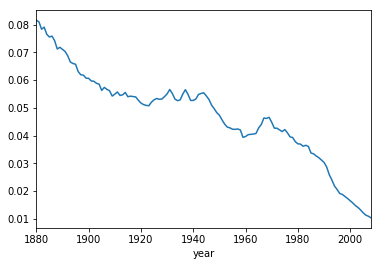

In [123]:
most_popular['prop'].plot()

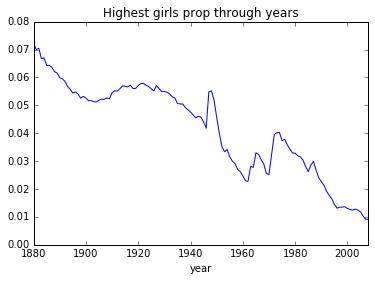

In [82]:
most_popular = girls.groupby('year').apply(get_max_record)
most_popular.prop.plot(title='Highest girls prop through years')

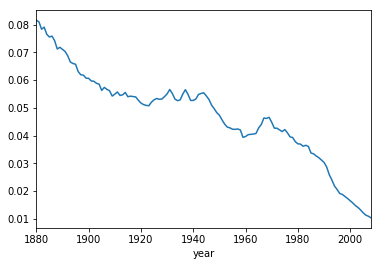

In [125]:
names[names.sex == 'boy'].groupby('year')['prop'].apply(max).plot()

## Part II

**Task:** Visualize the trend of a specific name through the years.

We can group by the name, but since we are not interested in the data of the other names, this a wasteful approach. We can either slice thedata of the relevant name, or reindex by the name. Also, since plots use the index as their x axis, it will be simpler to make the year a secondary index.

In [126]:
name = 'Elvis'

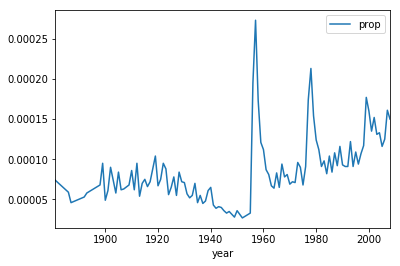

In [136]:
boys.loc[boys.name==name, ['year','prop']].set_index('year').plot()

In [137]:
boys_grpby_nm = boys.groupby('name')

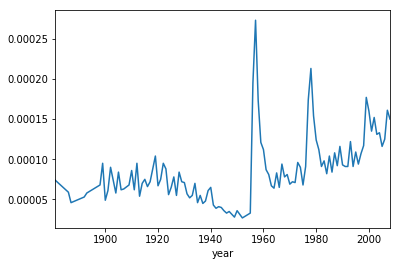

In [140]:
boys_grpby_nm.get_group(name).set_index('year')['prop'].plot()

In [144]:
boys.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [145]:
boys2 = boys.set_index(['name', 'year'])
boys2.head()

,,prop,sex,soundex
name,year,,,
John,1880,0.081541,boy,J500
William,1880,0.080511,boy,W450
James,1880,0.050057,boy,J520
Charles,1880,0.045167,boy,C642
George,1880,0.043292,boy,G620


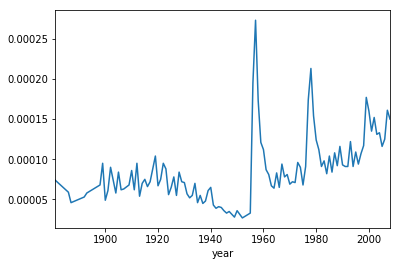

In [147]:
boys2.loc[name].prop.plot()

## Part III

**Task:** Visualize the "diversity" - how many names are required in order to describe half of the population - through the years.

For each year we will sum the 'prop' column (using the _cumsum()_ function) and find where this sum exceeds 0.5 (using the function _searchsorted()_).

### Demonstration

In [149]:
df_1880 = boys[boys.year == 1880]
df_1880.prop.head(5)

0    0.081541
1    0.080511
2    0.050057
3    0.045167
4    0.043292
Name: prop, dtype: float64

In [150]:
df_1880.prop.cumsum().head(5)

0    0.081541
1    0.162052
2    0.212109
3    0.257276
4    0.300568
Name: prop, dtype: float64

In [151]:
df_1880.prop.cumsum().searchsorted(0.5)

array([15], dtype=int64)

### Solution

In [152]:
def get_diversity(group):
    return 

In [162]:
boys.groupby('year')[['year','prop']].apply(pd.Series.cumsum)

TypeError: unbound method cumsum() must be called with Series instance as first argument (got DataFrame instance instead)

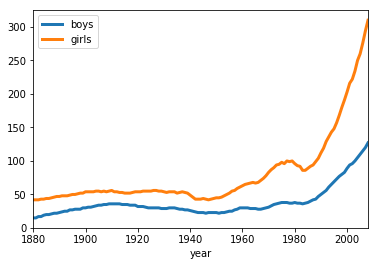

In [156]:
boys_diversity = boys.groupby('year').apply(get_diversity)
girl_diversity = girls.groupby('year').apply(get_diversity)
boys_diversity.plot(linewidth=3)
girl_diversity.plot(linewidth=3)
plt.legend(['boys', 'girls'], loc='best')

In [157]:
s = pd.Series([1, 3, 2, 4, 7, 3])
s.cumsum()

0     1
1     4
2     6
3    10
4    17
5    20
dtype: int64

# Exercise 1

Read the diamonds.csv file, follow the tasks and answer the questions below.

1.	Answer the following questions:
    * What is the highest price of a diamond with color ‘E’?
    * How many diamonds with ‘VS1’ are there in the data?
    * What is the average price of the ‘Ideal’-cut diamonds?
    * How many levels of cut, color and clarity are there in the data?
    * Calculate the average price for each combination of ‘cut’ and ‘clarity’.
2.	Create the following graphs of the entire diamonds data:
    * histograms of the ‘carat’ and ‘price’ values
    * bar-plot of the average price per ‘cut’ category
        * What is strange about the data?
    * a scatter plot of ‘price’ vs. ‘carat’
        * Do you see some patterns?
        * Do you think the dataset is biased?
    * a scatter plot of ‘y’ vs. ‘x’
        * Do you see the outliers?
    * Draw the price histogram of the diamonds with ‘Good’ cut, ‘VS2’ clarity and ‘E’ color